<a href="https://colab.research.google.com/github/Jontonio/ML-Iris-Prediction/blob/main/iris_prediccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modelo de machine learning - Iris Prediction**

In [ ]:
# importando liberias para manejo de datos
import pandas as pd
import numpy as np

In [ ]:
ruta = '/content/Iris.csv'
df = pd.read_csv( ruta )
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# contar la cantidad de datos nulos 
conteo = df.isna().sum()
conteo

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
# porcentaje de datos no nulos
porcentaje = ( conteo / df.shape[0]) * 100
porcentaje

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

In [ ]:
# borramos la columna Id para tener nuestros datos listos
df = df.drop('Id', axis= 1 )

In [ ]:
# Como no tenemos datos faltantes y los datos estan correctos procedemos a la siguiente fase

In [ ]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
# creamos una función para convertir las etiquetas a números para la matriz de correlación
def changeSpecies(data):
  if data == 'Iris-setosa':
    return 0
  if data == 'Iris-versicolor':
    return 1
  return 2

In [ ]:
df['Species'] = df['Species'].apply( changeSpecies )

**Fase 3 de extración de caracteríscas**

In [ ]:
# obtenemos la cantidad de datos por cada clase
clases_df = pd.value_counts( df['Species'], sort = True)
clases_df

2    50
1    50
0    50
Name: Species, dtype: int64

In [ ]:
# separación de datos para entrenamiento y prueba Y = la etiqueta y  X la data en si 
y = df['Species']
x = df.drop('Species', axis = 1)

In [ ]:
# separación de datos para entrenamiento y prueba
from sklearn.model_selection import train_test_split

x_entrenamiento , x_prueba, y_entrenamiento, y_prueba = train_test_split(x, y, train_size = 0.8)

In [ ]:
# Verificar si los datos estan parejeos en las clases
from collections import Counter
print("antes {}".format(Counter(y_entrenamiento)))

antes Counter({2: 41, 0: 40, 1: 39})


In [ ]:
# No es necesario utilizar metodos como sobremuestreo o submuestreo
# para efectos de demostración se va a utiliza el metodo que consigna perdida de datos (Submuestreo)
from imblearn.under_sampling import RandomUnderSampler
us = RandomUnderSampler()
x_entrenamiento_us, y_entrenamiento_us = us.fit_resample(x_entrenamiento, y_entrenamiento)
print("Despues {}".format(Counter(y_entrenamiento_us)))

Despues Counter({0: 39, 1: 39, 2: 39})


In [ ]:
# creando nuevo dataset balanceado = Juntando los datos balanceados 
df_balanceado = pd.DataFrame( data = x_entrenamiento_us, columns= df.drop('Species', axis= 1).columns)
df_balanceado['Species'] = y_entrenamiento_us

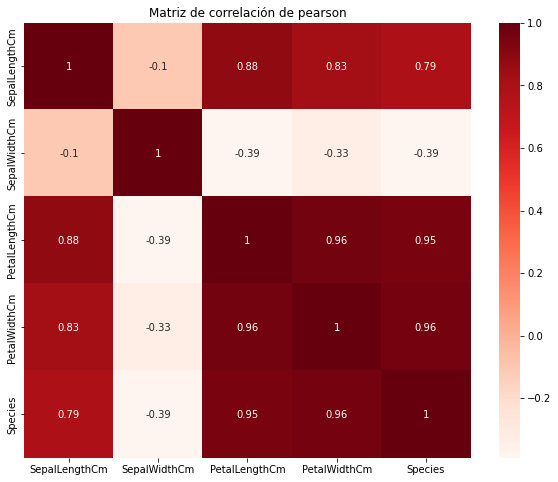

In [ ]:
# mostramos la correlación de pearson
import matplotlib.pyplot as plt
import seaborn as sns

cor_pearson = df_balanceado.corr(method = 'pearson')
plt.figure(figsize=(10,8))
sns.heatmap(cor_pearson, annot = True, cmap=plt.cm.Reds)
plt.title("Matriz de correlación de pearson")
plt.show()

In [ ]:
# mostrando la correlación con respecto a la varible de salida
corr_pearson = abs(cor_pearson['Species'])
corr_pearson

SepalLengthCm    0.786843
SepalWidthCm     0.390709
PetalLengthCm    0.948194
PetalWidthCm     0.956924
Species          1.000000
Name: Species, dtype: float64

**FASE DE ENTRENAMIENTO** 

In [ ]:
# Antes de pasa a los entrenamientos debemos importar las metricas de evauación
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

**REGRESIÓN LOGÍSTICA**

In [ ]:
# Importando el algoritmo
from sklearn.linear_model import LogisticRegression
regresion_logistica = LogisticRegression( max_iter=1000)
regresion_logistica.fit(x_entrenamiento_us, y_entrenamiento_us)

LogisticRegression(max_iter=1000)

In [ ]:
# Predicciones con los datos de prueba con regresión logística
regresion_logistica_prediccion = regresion_logistica.predict(x_prueba)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


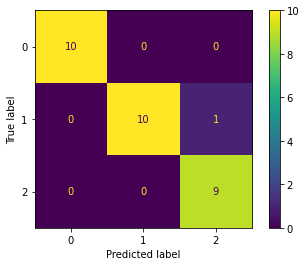

In [ ]:
# Matriz de confusión para las predicciones
plot_confusion_matrix( regresion_logistica, x_prueba, y_prueba)
plt.show()

In [ ]:
# Mostrando la metricas de evaluación 
print(classification_report(y_prueba, regresion_logistica_prediccion))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.91      0.95        11
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



**ALGORITMO K-MEANS**

In [ ]:
# importando el algoritmo
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_entrenamiento_us) 

KMeans(n_clusters=3)

In [ ]:
# mostrando los centroides
kmeans.cluster_centers_

array([[5.84791667, 2.725     , 4.3875    , 1.43333333],
       [4.95897436, 3.38205128, 1.48205128, 0.24102564],
       [6.83666667, 3.07333333, 5.73666667, 2.08      ]])

In [ ]:
# etiquetas
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0], dtype=int32)

In [ ]:
# verificamos la predicción
kmeans_prediccion = kmeans.predict(x_prueba)

In [ ]:
print(classification_report(y_prueba.astype(str), kmeans_prediccion.astype(str)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        11
           2       0.88      0.78      0.82         9

    accuracy                           0.23        30
   macro avg       0.29      0.26      0.27        30
weighted avg       0.26      0.23      0.25        30



**ÁRBOLES DE DECISIÓN**

In [ ]:
# Importando las librerias
from sklearn import tree
arbol_decision = tree.DecisionTreeClassifier(max_depth=20)
arbol_decision.fit(x_entrenamiento_us, y_entrenamiento_us)

DecisionTreeClassifier(max_depth=20)

In [ ]:
# Predicciones con los datos de prueba con arboles de decision
arboles_decision_prediccion = arbol_decision.predict(x_prueba)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


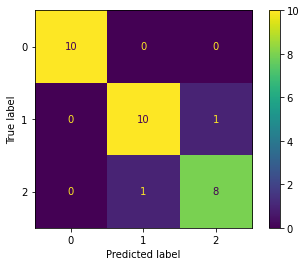

In [ ]:
plot_confusion_matrix( arbol_decision, x_prueba, y_prueba)
plt.show()

In [ ]:
# matriz de confusión para árboles de decisión
print(classification_report(y_prueba, arboles_decision_prediccion))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      0.91      0.91        11
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



**FASE DE PRUEBA**

In [ ]:
x_prueba

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
49,5.0,3.3,1.4,0.2
74,6.4,2.9,4.3,1.3
39,5.1,3.4,1.5,0.2
51,6.4,3.2,4.5,1.5
69,5.6,2.5,3.9,1.1
136,6.3,3.4,5.6,2.4
146,6.3,2.5,5.0,1.9
127,6.1,3.0,4.9,1.8
31,5.4,3.4,1.5,0.4
16,5.4,3.9,1.3,0.4


In [ ]:
y_prueba

49     0
74     1
39     0
51     1
69     1
136    2
146    2
127    2
31     0
16     0
50     1
59     1
58     1
125    2
36     0
129    2
15     0
124    2
38     0
57     1
102    2
70     1
47     0
9      0
19     0
97     1
111    2
145    2
54     1
67     1
Name: Species, dtype: int64

In [ ]:
data = [[4.1, 2.8, 6.1, 1.9]]

In [ ]:
# Regresión logistica 
print(f"Regresión logística: {regresion_logistica.predict(data)}")
# Kmeans
print(f"K-means: {kmeans.predict(data)}")
# Arboles de decisión
print(f"Arboles de decisión: {arbol_decision.predict(data)}")
print("\n"*5)

Regresión logística: [2]
K-means: [0]
Arboles de decisión: [2]








/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
